In [1]:
#Librerias para ML

#Manejo de la base de datos
import pandas as pd
import numpy as np

#Escalar Variables
from sklearn.preprocessing import MinMaxScaler

#Separar los datos entrenamiento y prueba
from sklearn.model_selection import train_test_split

#Evaluación del modelo
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import median_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

#Creación de modelo
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import statsmodels.api as sm

#Para graficas
import matplotlib.pyplot as plt
import seaborn as sns

#Private functions
from own_functions import residuos
from own_functions import comparisson
from own_functions import scorer

# 1. Cargando la BD

In [2]:
#Se crea un dataframe con los datos tratados
df = pd.read_csv('Train_prep_iter1.csv')

In [3]:
df.head(2)

,time,Seville_pressure,Valencia_wind_deg,Madrid_weather_id,Barcelona_weather_id,Seville_weather_id,Bilbao_weather_id,Madrid_wind_speed,Bilbao_rain_1h,Valencia_wind_speed,...,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
0,2015-01-01 03:00:00,sp25,level_5,800.0,800.0,800.0,800.0,0.666667,0.0,0.666667,...,265.938000,281.013000,269.338615,269.338615,281.013000,269.338615,274.254667,265.938000,265.938000,6715.666667
1,2015-01-01 06:00:00,sp25,level_10,800.0,800.0,800.0,800.0,0.333333,0.0,1.666667,...,266.386667,280.561667,270.376000,270.376000,280.561667,270.376000,274.945000,266.386667,266.386667,4171.666667


## 1.1 División de la base de datos en datos de entrada y salida

In [4]:
# Separamos de nuestros datos la variable de salida
output_name = ['load_shortfall_3h']

# Separamos la BD en datos cualitativos y cuantitativos
col_cat  = ['time', 'Seville_pressure', 'Valencia_wind_deg', 
            'Madrid_weather_id', 'Barcelona_weather_id', 
            'Seville_weather_id', 'Bilbao_weather_id']
col_num  = ['Madrid_wind_speed', 'Bilbao_rain_1h',
       'Valencia_wind_speed', 'Seville_humidity', 'Madrid_humidity',
       'Bilbao_clouds_all', 'Bilbao_wind_speed', 'Seville_clouds_all',
       'Bilbao_wind_deg', 'Barcelona_wind_speed', 'Barcelona_wind_deg',
       'Madrid_clouds_all', 'Seville_wind_speed', 'Barcelona_rain_1h', 
       'Seville_rain_1h', 'Bilbao_snow_3h',
       'Barcelona_pressure', 'Seville_rain_3h', 'Madrid_rain_1h',
       'Barcelona_rain_3h', 'Valencia_snow_3h','Bilbao_pressure', 
       'Valencia_pressure', 'Seville_temp_max', 'Madrid_pressure',
       'Valencia_temp_max', 'Valencia_temp',
       'Seville_temp', 'Valencia_humidity', 'Valencia_temp_min',
       'Barcelona_temp_max', 'Madrid_temp_max', 'Barcelona_temp',
       'Bilbao_temp_min', 'Bilbao_temp', 'Barcelona_temp_min',
       'Bilbao_temp_max', 'Seville_temp_min', 'Madrid_temp',
       'Madrid_temp_min']

In [5]:
# Separación de las variables
x = df.drop(columns = col_cat).drop(columns = output_name)
y = df[output_name]

# 2. Datos de entrenamiento y prueba 

In [6]:
# División de los datos en train y test
#En este caso, el 80% de los datos se utilizarán para entrenar el modelo. 

#Para los datos normales
X_train, X_test, y_train, y_test = train_test_split(
                                        x,
                                        y.values.reshape(-1,1),
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )

# 3. Creación de los modelos

## 3.1 Regresor lineal

In [7]:
OLS = LinearRegression()

## 3.2 Random Forest

In [8]:
# Creación del modelo randomForest con con 100 árboles y 5 niveles de profundidad
RF = RandomForestRegressor(
            n_estimators = 100,
            criterion    = 'friedman_mse',
            max_depth    = 5,
            max_features = 1.0,
            oob_score    = False,   #out-of-bag samples
            n_jobs       = -1,
            random_state = 1234
         )

# 4. Entrenamiento

In [9]:
# Entrenamiento del modelo Random Forest
OLS.fit( X_train, y_train.ravel())

LinearRegression()

In [10]:
# Entrenamiento del modelo Random Forest
RF.fit(X_train, y_train.ravel())

RandomForestRegressor(criterion='friedman_mse', max_depth=5, n_jobs=-1,
                      random_state=1234)

## 4.1 Residuos 

In [11]:
#Reducción de dimensionalidad del dataset: se convierte en una dimensión
y_train_flat = y_train.flatten()

In [12]:
# Diagnóstico errores (residuos) regresor lineal
#Se realiza la predicción sobre los datos de entrenamiento
ols_train_predict = OLS.predict(X_train)
#Se calculan los residuos: diferencia entre la prediccion y el valor real en los datos de entreanamiento
ols_residuos  = ols_train_predict - y_train_flat

d:\10. Personal\Especialización UDEA\Modulo 11. Monografia\Iteraciones\1\own_functions.py:66: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  axes[0, 0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()],
d:\10. Personal\Especialización UDEA\Modulo 11. Monografia\Codigo\.venv\lib\site-packages\statsmodels\graphics\gofplots.py:1045: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


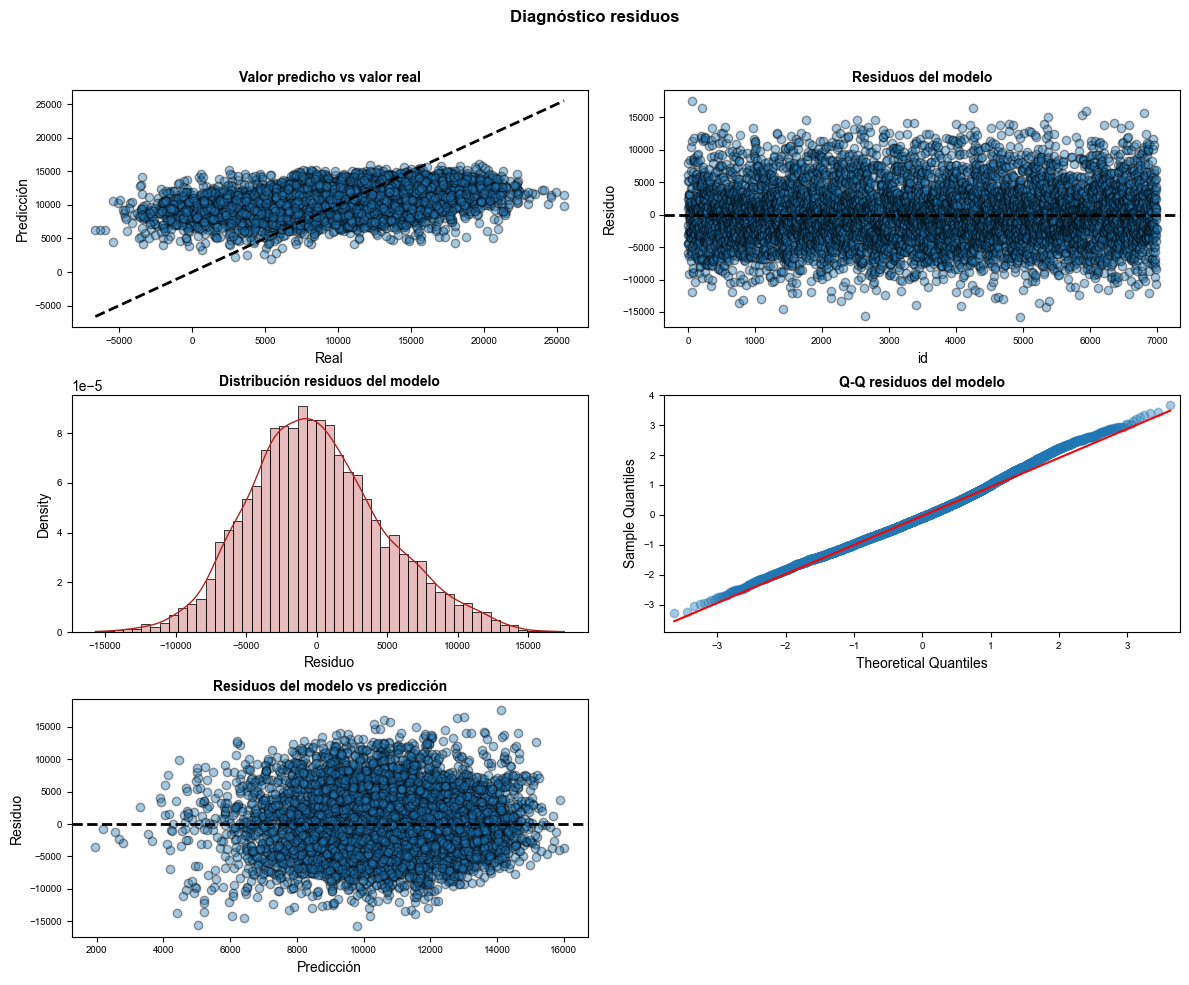

In [13]:
residuos(y_train_flat, ols_train_predict, ols_residuos)

In [14]:
# Diagnóstico errores (residuos) Random Forest
#Se realiza la predicción sobre los datos de entrenamiento
rf_train_predict = RF.predict(X_train)
#Se calculan los residuos: diferencia entre la prediccion y el valor real en los datos de entreanamiento 
rf_residuos  = rf_train_predict - y_train_flat

d:\10. Personal\Especialización UDEA\Modulo 11. Monografia\Iteraciones\1\own_functions.py:66: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  axes[0, 0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()],
d:\10. Personal\Especialización UDEA\Modulo 11. Monografia\Codigo\.venv\lib\site-packages\statsmodels\graphics\gofplots.py:1045: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


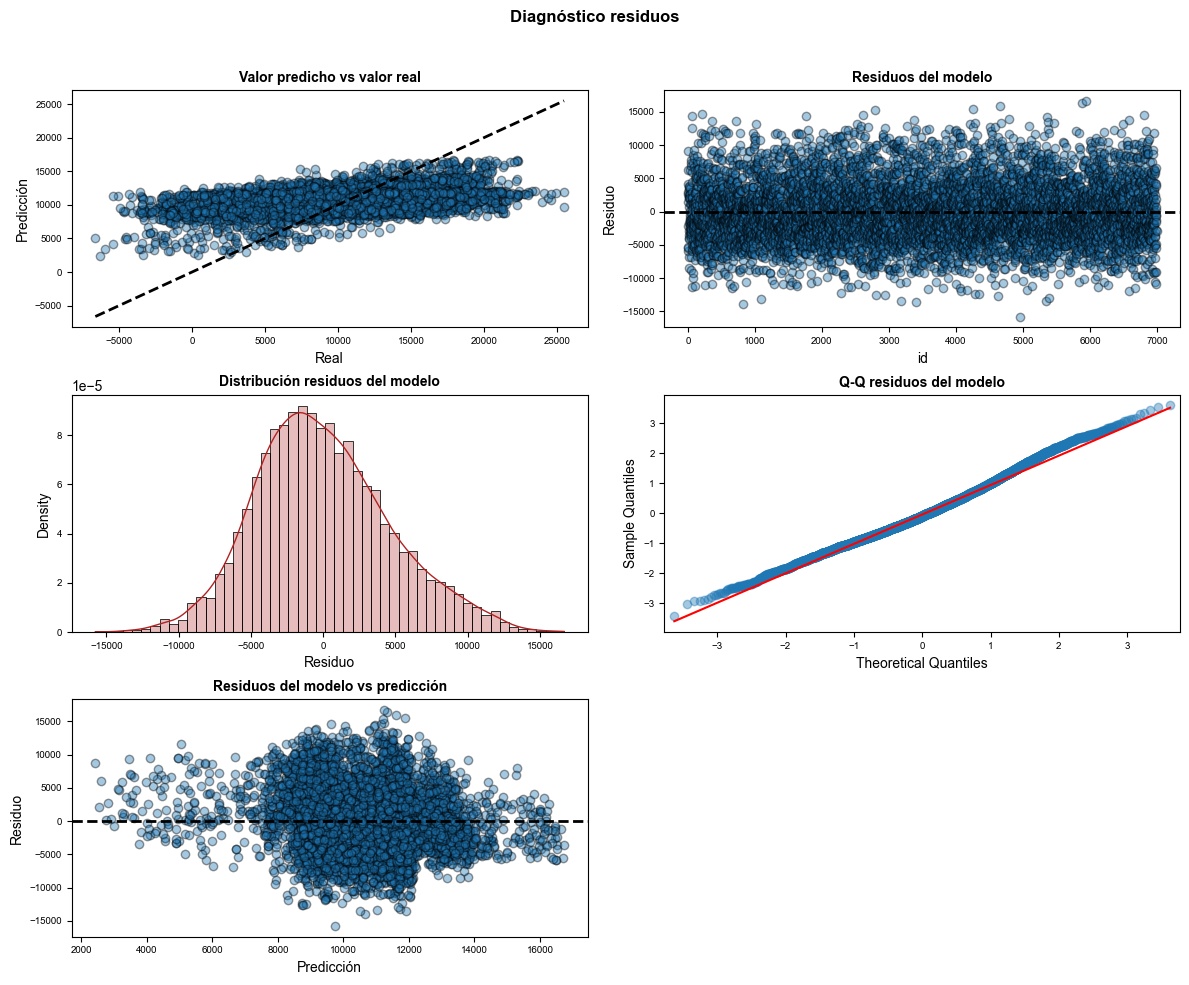

In [15]:
residuos(y_train_flat, rf_train_predict, rf_residuos)

# 5. Evaluación

## 5.1 Metricas

In [16]:
# Error de test del modelo 
Y_test_OLS = OLS.predict(X_test)

results_OLS = scorer(y_test,Y_test_OLS,'Linear Regresor')

El error MSE de test para el Linear Regresor es: 23902430.507527526
El error RMSE de test para el Linear Regresor es: 4889.0111993661385
El error MAE de test para el Linear Regresor es: 3883.4320200877874
El error MedAE de test para el Linear Regresor es: 3245.8227541512624
El error MAPE de test para el Linear Regresor es: 1.9865056231918867
El error R2 de test para el Linear Regresor es: 0.14163457545179892


In [17]:
# Error de test del modelo 
Y_test_RF = RF.predict(X_test)

results_RF = scorer(y_test,Y_test_RF,'Random Forest')

El error MSE de test para el Random Forest es: 23393280.287888244
El error RMSE de test para el Random Forest es: 4836.660034351003
El error MAE de test para el Random Forest es: 3836.2827799811985
El error MedAE de test para el Random Forest es: 3262.8400737730253
El error MAPE de test para el Random Forest es: 2.0301510295050353
El error R2 de test para el Random Forest es: 0.15991878066272291


## 5.2 Graficas

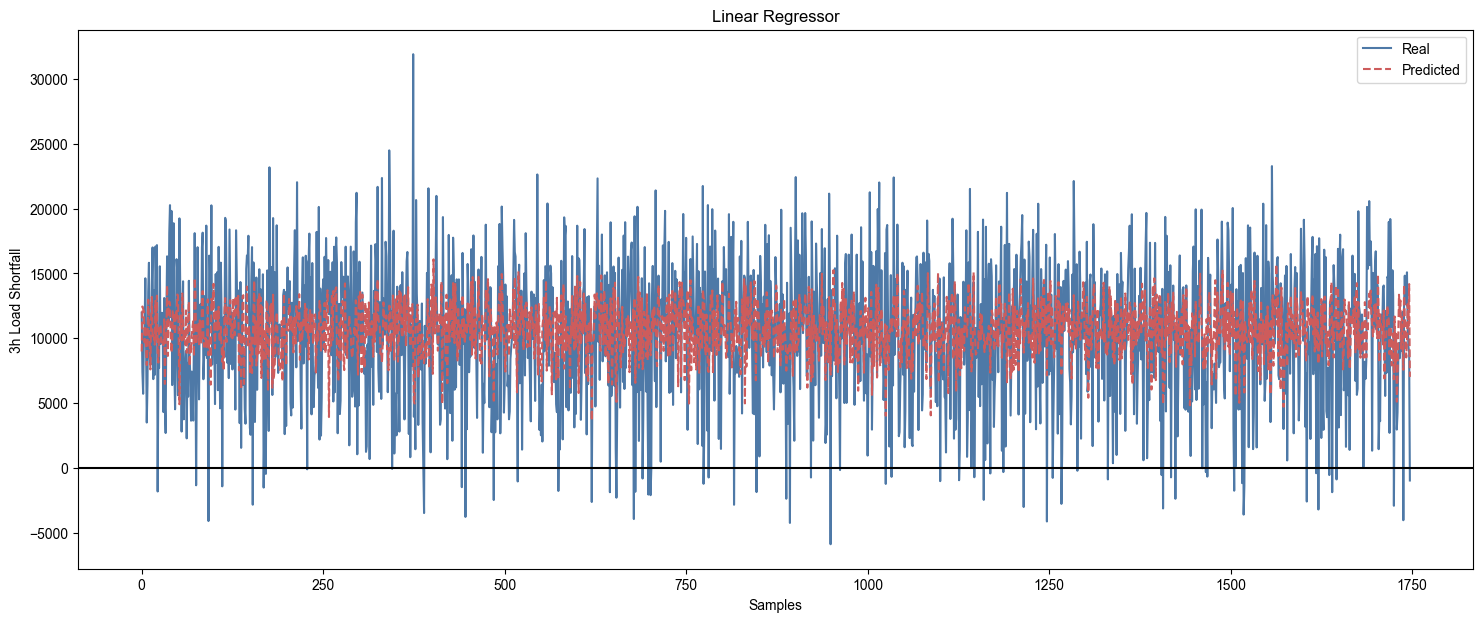

In [18]:
comparisson(y_test, Y_test_OLS, 'Linear Regressor',(18,7))

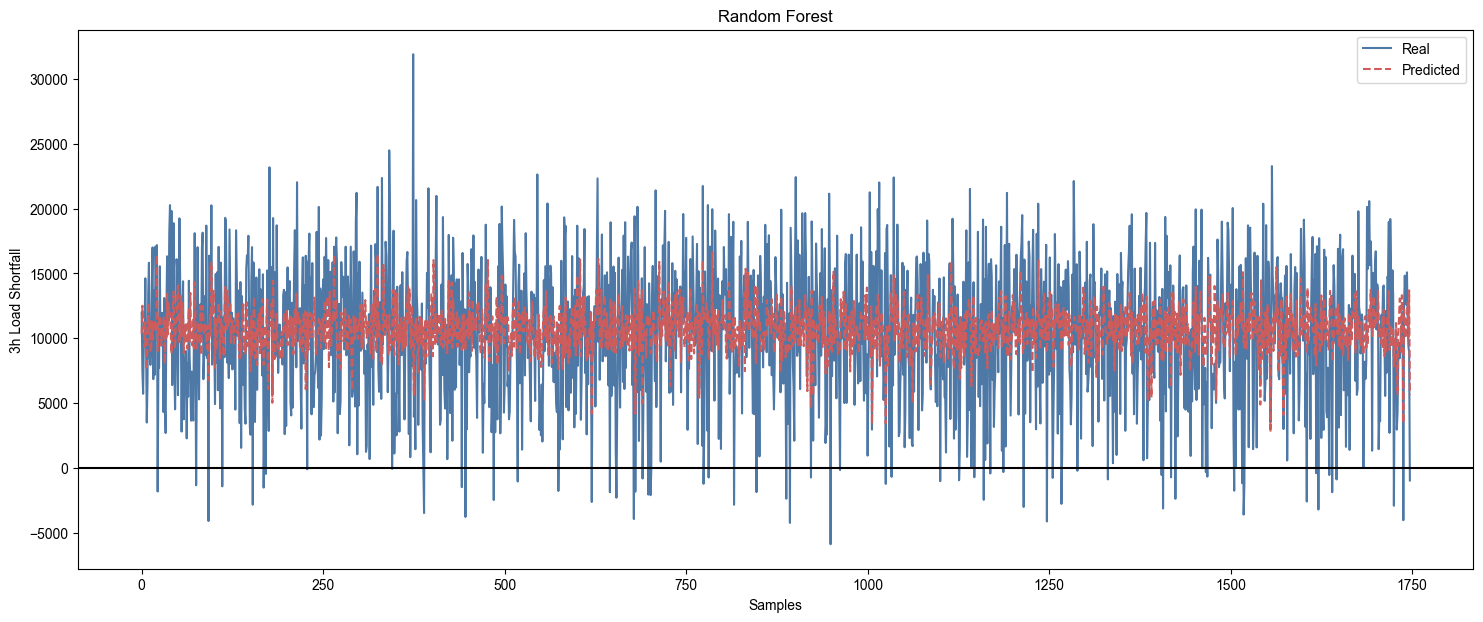

In [19]:
comparisson(y_test, Y_test_RF, 'Random Forest',(18,7))